# Hierarchical clustering with 2D toy datasets

# [作業目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [1]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 雙半月 資料點
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# 生成 緊密三群 資料點
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# 生成 2維均勻分布 資料點
no_structure = np.random.rand(n_samples, 2), None

In [45]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [(noisy_moons, {'n_clusters': 2}), (blobs, {}), (no_structure, {})]

<Figure size 720x576 with 0 Axes>

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

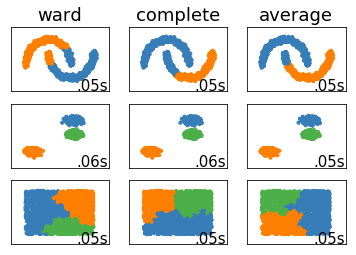

In [44]:
# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_param) in enumerate(datasets):
    param = default_base.copy()
    param.update(algo_param)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    est_ward = cluster.AgglomerativeClustering(n_clusters=param['n_clusters'], linkage='ward')
    est_complete = cluster.AgglomerativeClustering(n_clusters=param['n_clusters'], linkage='complete')
    est_avg = cluster.AgglomerativeClustering(n_clusters=param['n_clusters'], linkage='average')
    cluster_algorithm = [('ward', est_ward),
                         ('complete', est_complete),
                         ('average', est_avg)]
    
    for name, algorithm in cluster_algorithm:
        plt.subplot(len(datasets), len(cluster_algorithm), plot_num)
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
            
        if i_dataset == 0:
            plt.title(name, size=18)
        
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks([])
        plt.yticks([])
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
         horizontalalignment='right')
        plot_num = plot_num + 1
        
plt.show()